<h1 style="color:Green"> Version 2 

<h2 style="color:Red"> Repetability Tests Analysis

In [1]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Read the CSV file into a DataFrame
data = pd.read_csv('DataAnalysisRepeatability.csv')
data.head(5)

,Test Number,TEST,X_Point1,Y_Point1,Z_Point1,X_Point2,Y_Point2,Z_Point2
0,Test1,Piston,-20.062,-3.980,52.194,-20.046,-3.984,112.181
1,Test2,Piston,-20.050,-3.993,52.197,-20.032,-3.997,112.183
2,Test3,Piston,-20.062,-3.984,52.191,-20.043,-3.986,112.179
3,Test4,Piston,-20.055,-3.988,52.188,-20.036,-3.988,112.176
4,Test5,Piston,-20.054,-3.986,52.193,-20.034,-3.987,112.181


In [2]:
data.columns

Index(['Test Number', 'TEST', 'X_Point1', 'Y_Point1', 'Z_Point1', 'X_Point2',
       'Y_Point2', 'Z_Point2'],
      dtype='object')

In [3]:
# Convert the column that contains 'TEST' in its name to categorical
data["TEST"] = pd.Categorical(data["TEST"])

# Looking into different types of Catagory
Category = data['TEST'].cat.categories
Category
#data.dtypes

Index(['Piston', 'Piston_Rail', 'Rail'], dtype='object')

<h3 style="color:Red"> Box Plots 

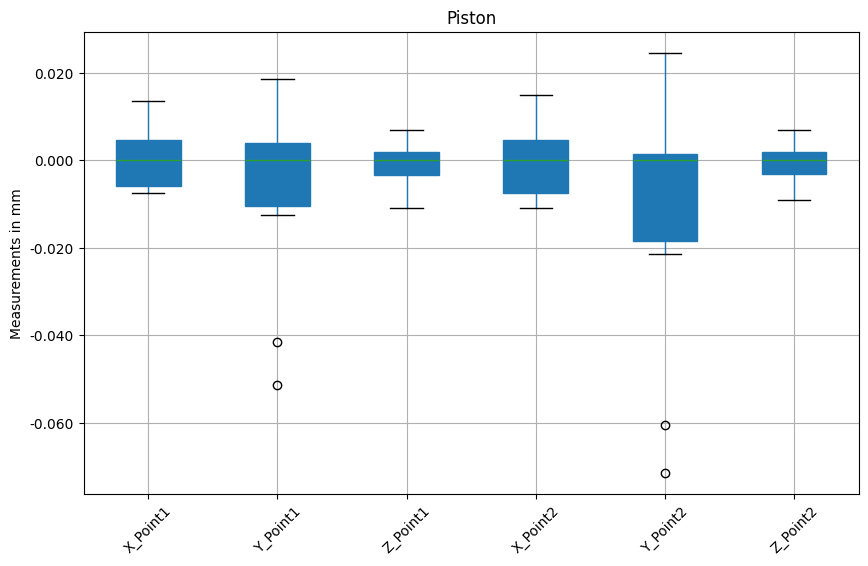

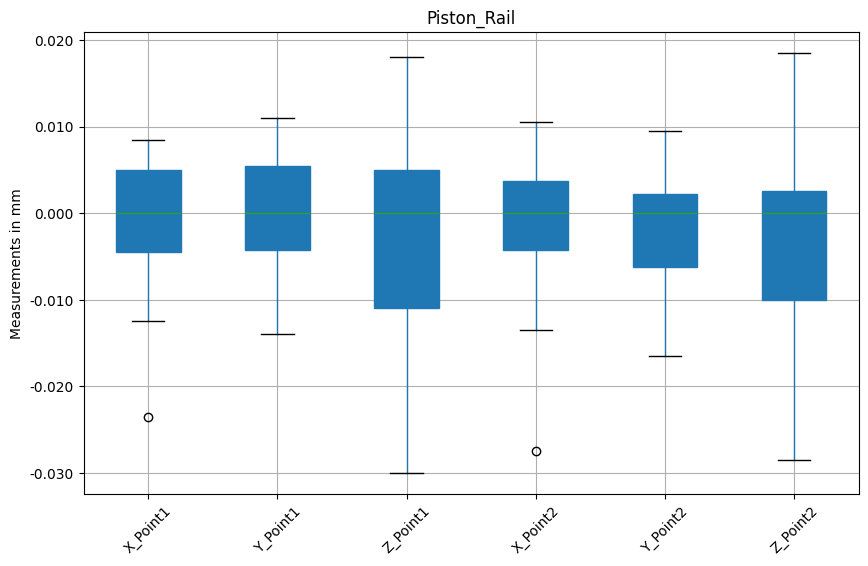

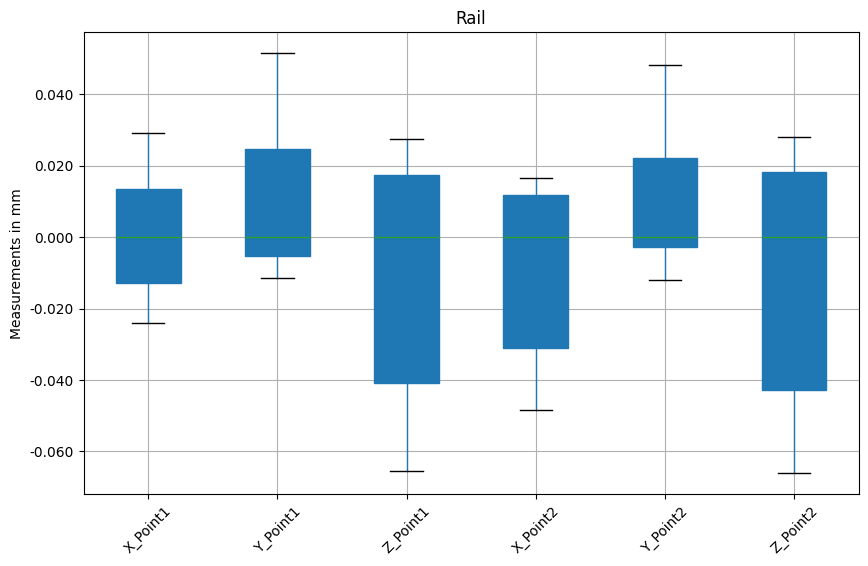

In [4]:
dict = {}

for i, different_tests in enumerate(Category):
    Key = Category[i]
    dict[Key] = data[data["TEST"] == Category[i]]

for Keys, Values in dict.items():
    # Identify categorical columns
    categorical_columns = Values.select_dtypes(include=['object', 'category']).columns

    # Drop categorical columns
    no_categorical = Values.drop(columns=categorical_columns)

    #Standardize data for comperasion
    data_Standardize = no_categorical - no_categorical.median(axis=0)

    # Box Plot
    plt.figure(figsize=(10,6))
    data_Standardize.boxplot(patch_artist=True)
    plt.title(Keys)
    plt.ylabel("Measurements in mm")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
    plt.show()

<h3 style="color:Red"> Error Bar

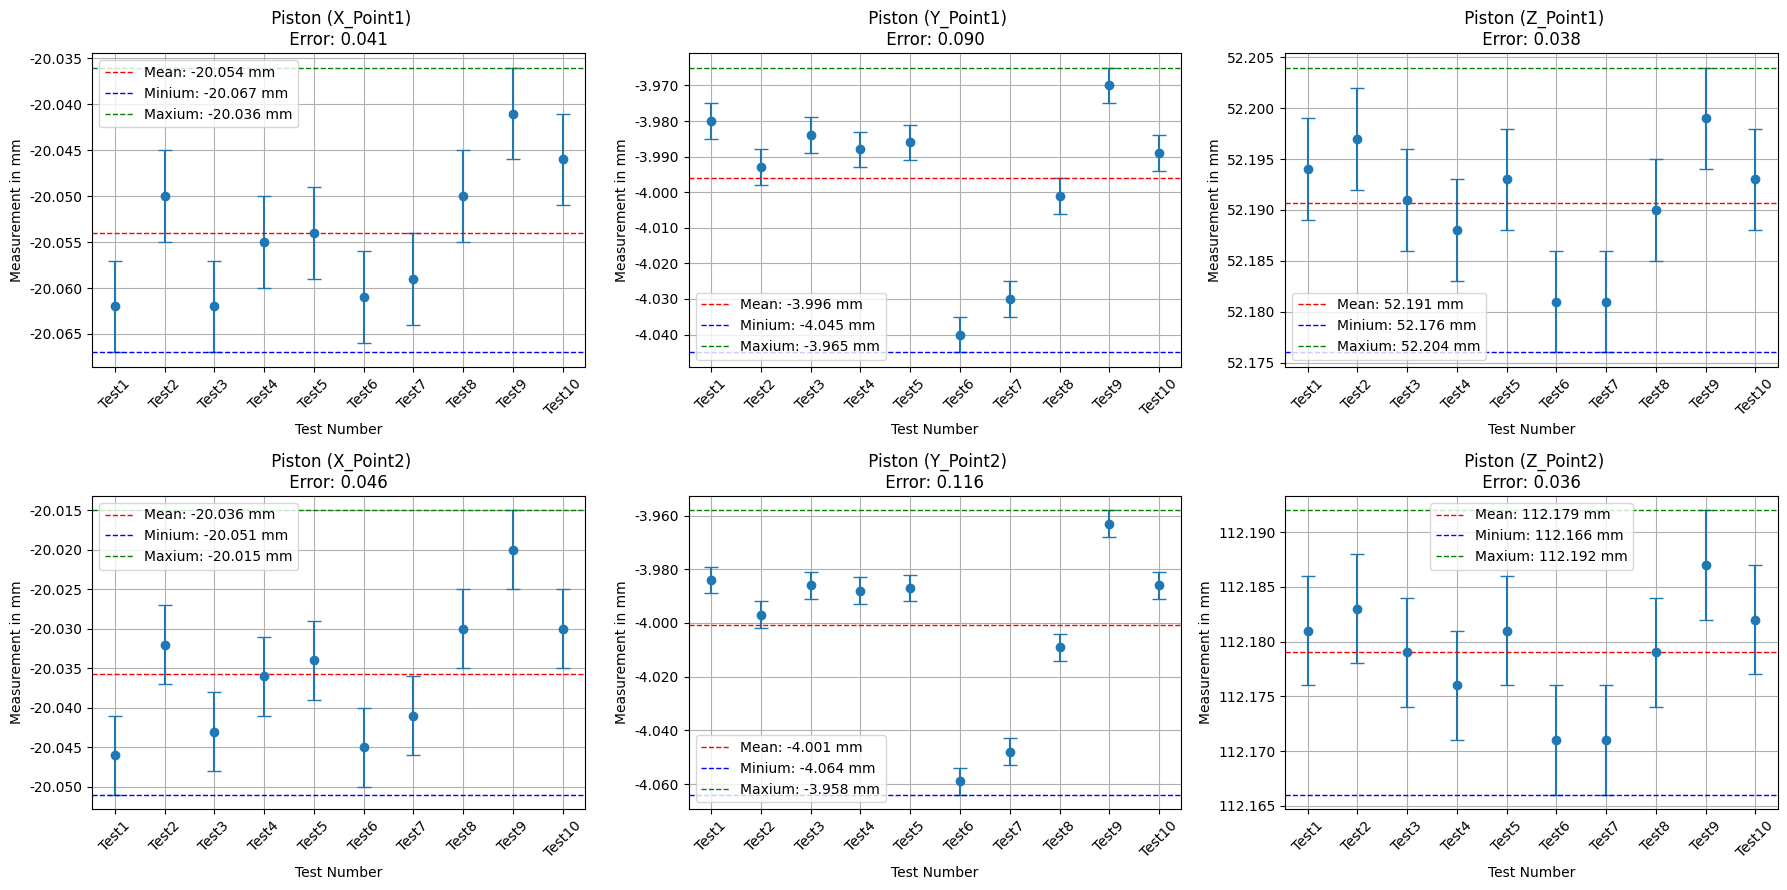

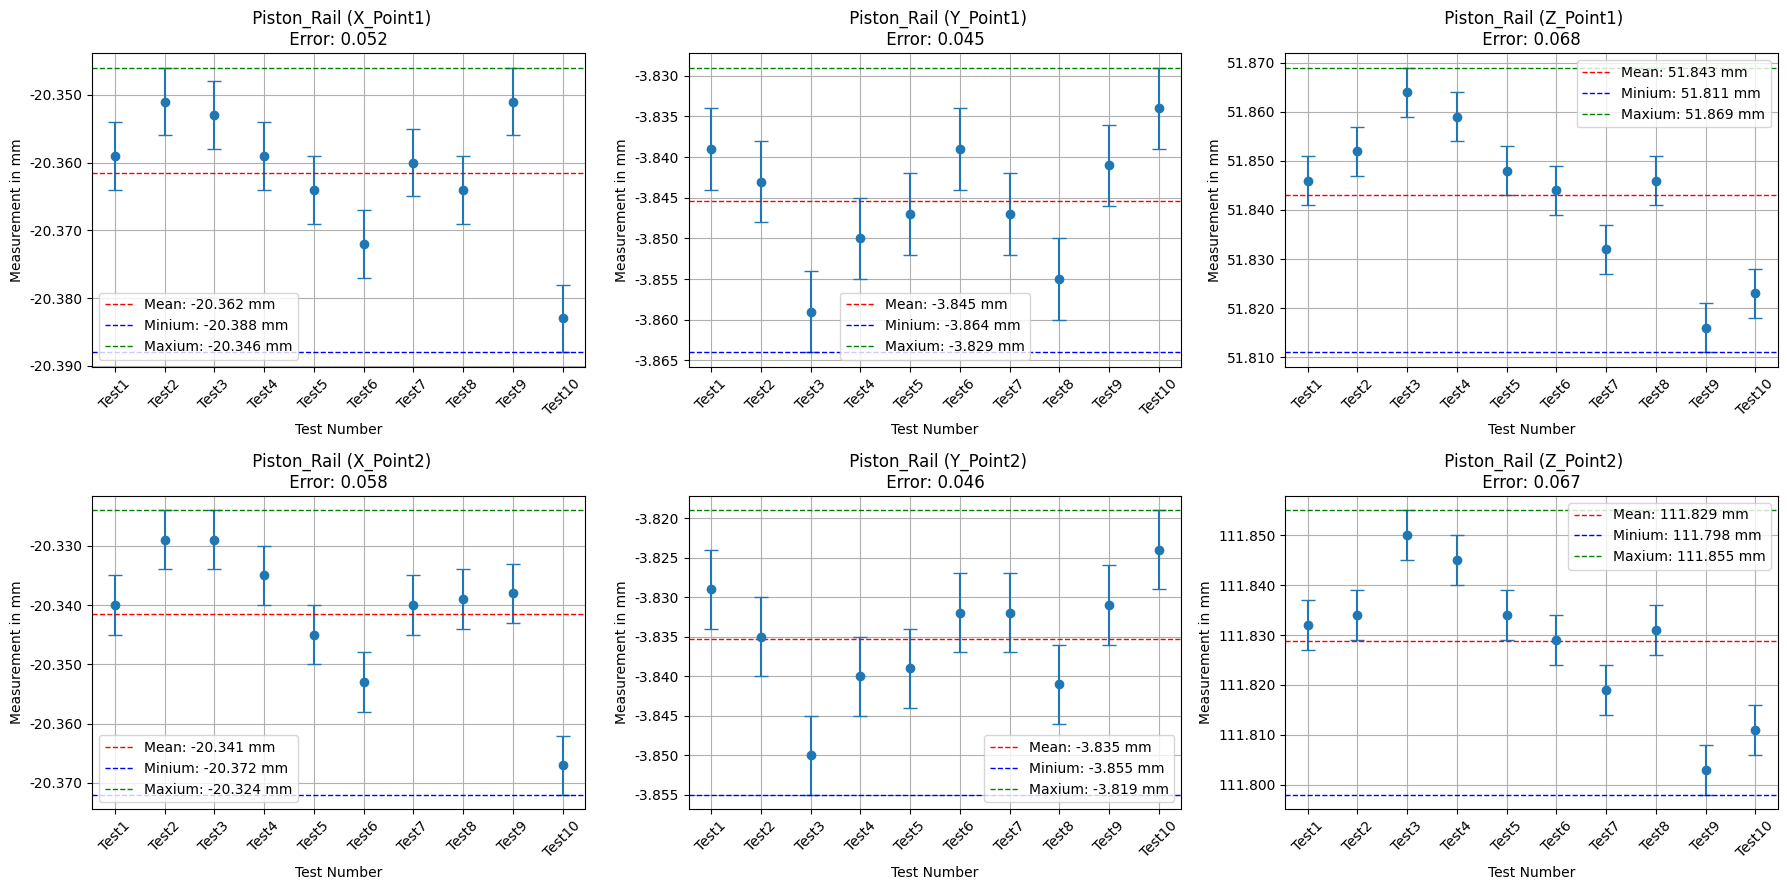

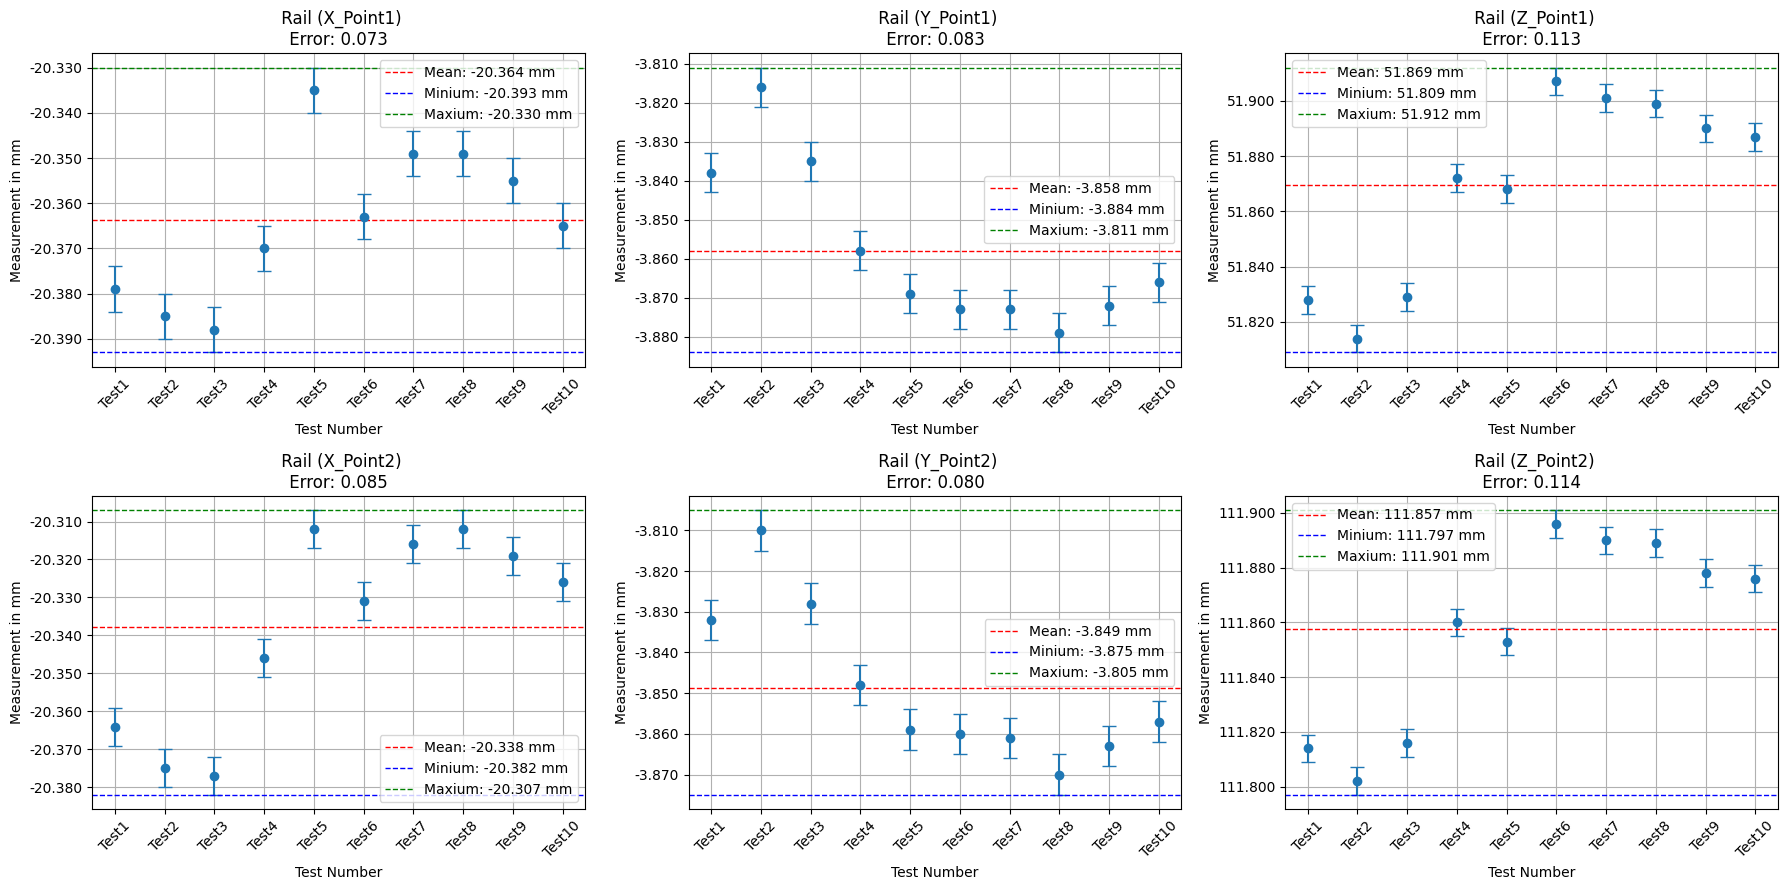

In [5]:
# Plot
machine_error = 5/1000 # in mm

mean_error = {}

for Keys, Values in dict.items():
    # Create a figure with 6 subplots (2 rows, 3 columns)
    fig, axes = plt.subplots(2, 3, figsize=(18, 9))

    # Loop to generate six different graphs
    for i, ax in enumerate(axes.flat, start=2):    
        
        # Calculate the mean of the current column
        mean_value = dict[Keys][dict[Keys].columns[i]].mean()
        minium_Value = dict[Keys][dict[Keys].columns[i]].min()-machine_error
        maxium_Value = dict[Keys][dict[Keys].columns[i]].max()+ machine_error
        Error = (maxium_Value - minium_Value)+2*machine_error
        ax.errorbar(dict[Keys]["Test Number"], dict[Keys][dict[Keys].columns[i]],  yerr= machine_error, fmt='o', capsize=5)
        # Add a horizontal and Vertical mean line
        ax.axhline(y=mean_value, color='r', linestyle='--', linewidth=1, label=f'Mean: {mean_value:.3f} mm')
        ax.axhline(y=minium_Value, color='b', linestyle='--', linewidth=1, label=f'Minium: {minium_Value:.3f} mm')
        ax.axhline(y=maxium_Value, color='g', linestyle='--', linewidth=1, label=f'Maxium: {maxium_Value:.3f} mm')
        ax.set_title(f' {Keys} ({dict[Keys].columns[i]})\n Error: {Error:.3f} ')
        ax.set_ylabel('Measurement in mm')
        ax.set_xlabel('Test Number')
        ax.tick_params(axis='x', labelrotation=45)
        ax.legend()
        ax.grid(True)
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
        #print(f' {Keys} ({dict[Keys].columns[i]}), Mean: {mean_value:.3f},  Error: {Error:.3f} ')
        key = f' {Keys} ({dict[Keys].columns[i]})'
        mean_error[key] = [mean_value, Error]
             
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

<h3 style="color:Red"> Summary and output results to To CSV

In [6]:
outcomes = pd.DataFrame(mean_error)
outcomes.index = ["Mean", "Error"]
outcomes = outcomes.T.round(3)
outcomes.to_csv("Outcomes.csv")
outcomes

,Mean,Error
Piston (X_Point1),-20.054,0.041
Piston (Y_Point1),-3.996,0.090
Piston (Z_Point1),52.191,0.038
Piston (X_Point2),-20.036,0.046
Piston (Y_Point2),-4.001,0.116
Piston (Z_Point2),112.179,0.036
Piston_Rail (X_Point1),-20.362,0.052
Piston_Rail (Y_Point1),-3.845,0.045
Piston_Rail (Z_Point1),51.843,0.068
Piston_Rail (X_Point2),-20.342,0.058


<h2>END